In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [55]:
def read_mem_log(mem_log_file_path, col_name):

    mem_df = pd.read_csv(mem_log_file_path)

    t = pd.to_datetime(mem_df.time, errors='coerce', format='%Y/%m/%d %H:%M:%S')
    seconds = (t - t.min()).dt.total_seconds()
    minutes = (seconds / 60)

    mem_df['minutes'] = minutes.round(2)
    mem_df['mem_gb'] = (mem_df[col_name].astype(np.int64) / 1_000_000_000)
    
    mem_df = mem_df.sort_values('minutes')

    mem_df = mem_df[['mem_gb', 'minutes']].set_index('minutes')
    
    #print(mem_df)
    
    return mem_df

In [49]:
def plot_mem_usage(mem_log_file_path, col_name):
    
    mem_df = read_mem_log(mem_log_file_path, col_name)
    
    with plt.style.context('seaborn'):
        ax = mem_df['mem_gb'].plot()
        ax.set_ylabel(f"{col_name} (GB)")
        ax.set_xlabel(f"runtime (minutes)")
        plt.title(f"title")


           mem_gb
minutes          
0.00     0.083485
0.00     0.081060
0.00     0.081412
0.00     0.081494
0.00     0.081502
...           ...
32.64    7.988146
33.14    7.988171
33.65    8.063738
34.15    8.062783
34.93    7.963054

[102 rows x 1 columns]


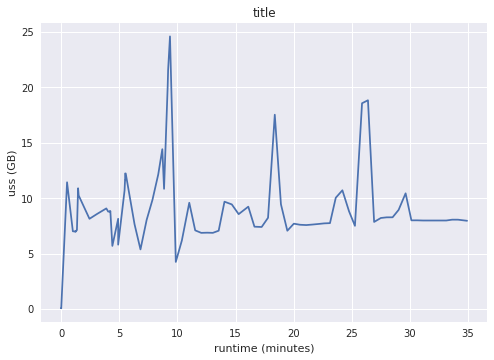

In [20]:
# chunk_size: 24_000_000_000
mem_log_file_path = os.path.join('output_full', 'log', 'mem.csv')

plot_mem_usage(mem_log_file_path, 'uss')

           mem_gb
minutes          
0.00     0.085729
0.00     0.085746
0.00     0.085746
0.00     0.085783
0.00     0.085791
...           ...
32.87    7.956029
33.37    7.956029
33.88    8.030048
34.43    8.335167
35.24    7.933764

[84 rows x 1 columns]


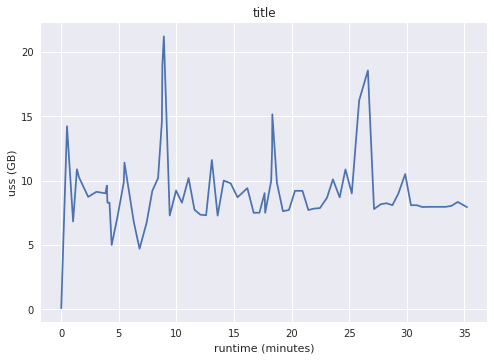

In [21]:
# chunk_size: 20_000_000_000
mem_log_file_path = os.path.join('output_full', 'log', 'mem.csv')

plot_mem_usage(mem_log_file_path, 'uss')

           mem_gb
minutes          
0.00     0.084464
0.00     0.082739
0.00     0.082862
0.00     0.082903
0.00     0.082915
...           ...
31.81    7.976104
32.31    7.976100
32.83    8.056402
33.34    8.057209
34.12    7.951266

[139 rows x 1 columns]


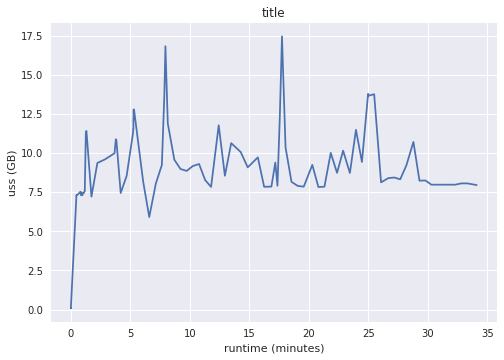

In [22]:
# chunk_size: 16_000_000_000
mem_log_file_path = os.path.join('output_full', 'log', 'mem.csv')

plot_mem_usage(mem_log_file_path, 'uss')

           mem_gb
minutes          
0.00     0.083313
0.00     0.083681
0.00     0.083681
0.00     0.083751
0.00     0.083743
...           ...
31.80    7.994012
32.30    7.994012
32.83    8.057205
33.33    8.055259
34.09    7.999332

[77 rows x 1 columns]


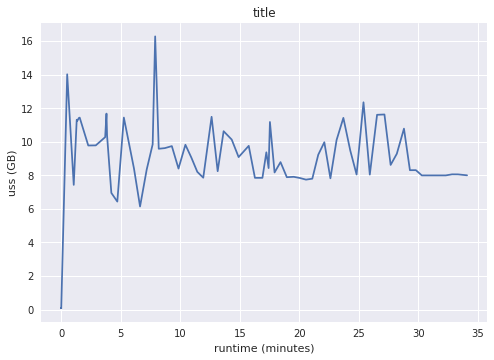

In [23]:
# chunk_size: 14_000_000_000
mem_log_file_path = os.path.join('output_full', 'log', 'mem.csv')

plot_mem_usage(mem_log_file_path, 'uss')

           mem_gb
minutes          
0.00     0.082846
0.00     0.080777
0.00     0.080777
0.00     0.080822
0.00     0.081162
...           ...
32.03    7.923147
32.53    7.923147
33.04    7.988842
33.54    7.989522
34.30    7.945794

[90 rows x 1 columns]


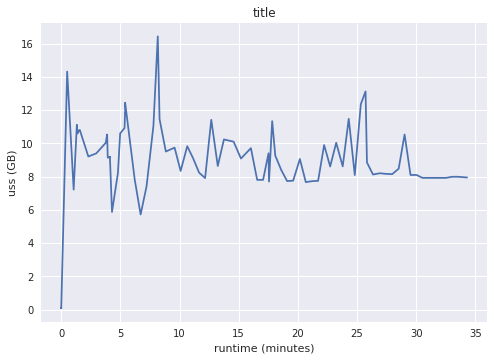

In [24]:
# repear, retrained from above
# chunk_size: 14_000_000_000
mem_log_file_path = os.path.join('output_full', 'log', 'mem.csv')

plot_mem_usage(mem_log_file_path, 'uss')

           mem_gb
minutes          
0.00     0.083919
0.00     0.083964
0.00     0.083964
0.00     0.084009
0.00     0.084001
...           ...
33.47    8.071713
33.97    8.071713
34.48    8.129343
35.00    8.130298
35.77    8.027341

[123 rows x 1 columns]


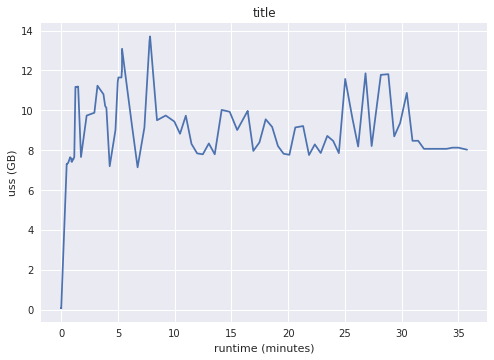

In [25]:
# chunk_size: 13_000_000_000
mem_log_file_path = os.path.join('output_full', 'log', 'mem.csv')

plot_mem_usage(mem_log_file_path, 'uss')

           mem_gb
minutes          
0.00     0.084247
0.00     0.084267
0.00     0.084640
0.00     0.084869
0.00     0.084881
...           ...
33.09    8.079266
33.59    8.079266
34.10    8.135651
34.70    8.141230
35.27    8.049500

[128 rows x 1 columns]


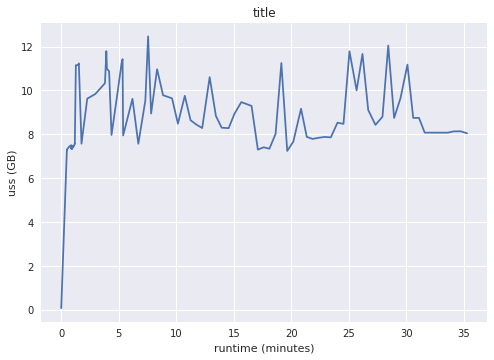

In [31]:
# chunk_size: 13_000_000_000
# chunk_training_mode: production
mem_log_file_path = os.path.join('output_full', 'log', 'mem.csv')

plot_mem_usage(mem_log_file_path, 'uss')

           mem_gb
minutes          
0.00     0.118637
0.00     0.118669
0.10     7.340384
0.10     7.351337
0.10     7.352418
...           ...
42.98    6.177067
43.03    6.657565
43.12    6.671307
43.20    6.689026
43.28    6.689055

[561 rows x 1 columns]


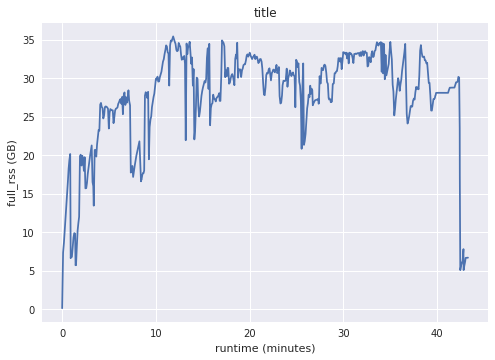

In [44]:
# multiprocess
# chunk_size: 0
# chunk_training_mode: production
mem_log_file_path = os.path.join('output_mp', 'log', 'mem.csv')

plot_mem_usage(mem_log_file_path, 'full_rss')

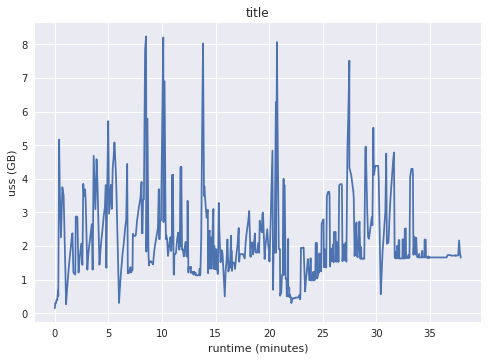

In [56]:
# multiprocess
# chunk_size: 0
# chunk_training_mode: production
mem_log_file_path = os.path.join('output_mp', 'log', 'mp_households_0-mem.csv')

plot_mem_usage(mem_log_file_path, 'uss')

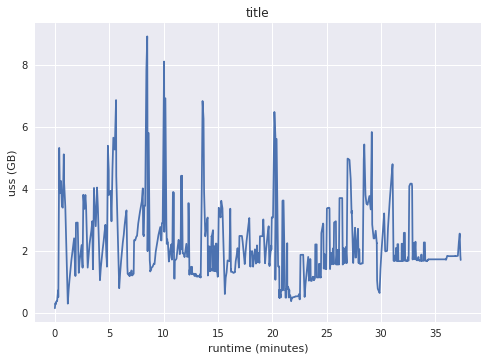

In [57]:
# multiprocess
# chunk_size: 0
# chunk_training_mode: production
mem_log_file_path = os.path.join('output_mp', 'log', 'mp_households_1-mem.csv')

plot_mem_usage(mem_log_file_path, 'uss')

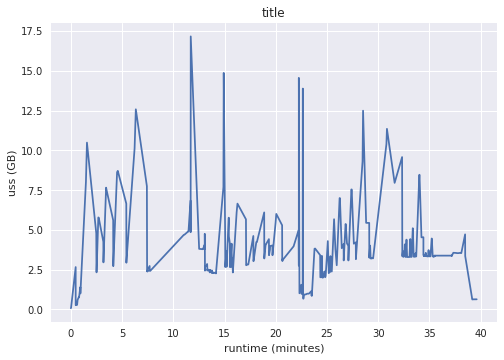

In [58]:
# multiprocess
# chunk_size: 0
# chunk_training_mode: production
mem_log_file_path = os.path.join('output_mp', 'log', 'omnibus_mem.csv')

plot_mem_usage(mem_log_file_path, 'uss')